In [ ]:
pip install turicreate

     |████████████████████████████████| 92.0 MB 4.5 kB/s 
     |████████████████████████████████| 3.6 MB 48.5 MB/s 
     |████████████████████████████████| 3.5 MB 30.2 MB/s 
     |████████████████████████████████| 86.4 MB 27 kB/s 
     |████████████████████████████████| 322 kB 69.1 MB/s 
     |████████████████████████████████| 18.3 MB 1.3 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 3.8 MB 29.9 MB/s 
     |████████████████████████████████| 2.9 MB 29.3 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 449 kB 61.6 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=a4b6c7d002267d14e2c8635269fb47be46f0e5912af909a2cfc24e626f7c6fb2
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320860 sha256=e607f4f9e4

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Analyze Product Sentiment

In [ ]:
import turicreate

# Read product review data

In [ ]:
products = turicreate.SFrame('/content/gdrive/My Drive/Turicreate/Week 3/amazon_baby.sframe')

# Explore data

In [ ]:
products

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


In [ ]:
products.groupby('name',operations={'count':turicreate.aggregate.COUNT()}).sort('count',ascending=False)

# Building a sentiment classifier

## Build word count vectors

In [ ]:
products['word_count'] = turicreate.text_analytics.count_words(products['review'])

In [ ]:
products

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ..."


In [ ]:
products['name'].show()

Materializing SArray

# Examine the reivews for the most-reviewed product

In [ ]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [ ]:
giraffe_reviews

name,review,rating,word_count
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ..."
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ..."
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ..."
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ..."
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ..."
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'off': 1.0, 'have': 2.0,'of': 1.0, 'some': 1.0, ..."


In [ ]:
len(giraffe_reviews)

785

In [ ]:
giraffe_reviews['rating'].show() 

Materializing SArray

In [ ]:
### products['sentiment'].show()

# Build a sentiment classifier

In [ ]:
products['rating'].show()

Materializing SArray

## Define whats positive and a negative sentiment

In [ ]:
#ignore all 3*  reviews
products = products[products['rating']!= 3]

In [ ]:
#positive sentiment = 4-star or 5-star reviews
products['sentiment'] = products['rating'] >= 4

In [ ]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",1


## Lets train the sentiment classifier

In [ ]:
train_data,test_data = products.random_split(.8,seed=0)

In [ ]:
sentiment_model = turicreate.logistic_classifier.create(train_data,target='sentiment', features=['word_count'], validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 2.574435     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 4.478346     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 5.402969     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 5.999639     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 6.910999     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 10.223674    | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Evaluate teh sentimental model

In [ ]:
sentiment_model.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0    |        1.0         |        1.0         | 27976 | 5328 |
 |   0.001   | 0.698948948948949  | 0.9933514440949385 | 27976 | 5328 |
 |   0.002   | 0.6619744744744744 | 0.9922076065198742 | 27976 | 5328 |
 |   0.003   | 0.6385135135135135 | 0.9909922790963683 | 27976 | 5328 |
 |   0.004   |  0.62256006006006  | 0.9903846153846154 | 27976 | 5328 |
 |   0.005   | 0.6112987987987988 | 0.989848441521304  | 27976 | 5328 |
 |   0.006   | 0.6002252252252253 | 0.9894195024306548 | 27976 | 5328 |
 |   0.007   | 0.589527027027027  | 0.9888475836431226 | 27976 | 5328 |
 |   0.008   | 0.5816441441441441 | 0.9883828996282528 | 27976 | 5328 |
 |   0.009   | 0.574512012012012

In [ ]:
sentiment_model

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 57357
Number of examples             : 133448
Number of classes              : 2
Number of feature columns      : 1
Number of unpacked features    : 57356

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : lbfgs
Solver iterations              : 10
Solver status                  : Completed (Iteration limit reached).
Training time (sec)            : 6.7538

Settings
--------
Log-likelihood                 : 9590.1752

Highest Positive Coefficients
-----------------------------
word_count[arghhhhhh]          : 49.2272
word_count[joovys]             : 34.2942
word_count[screencons]         : 29.1217
word_count[punchers]           : 27.5292
word_count[angrily]            : 27.3339

Lowest Negative Coefficients
----------------------------
word_count[transpired]        

In [ ]:
pip install matplotlib

In [ ]:
roc_eval = sentiment_model.evaluate(test_data, metric='roc_curve')

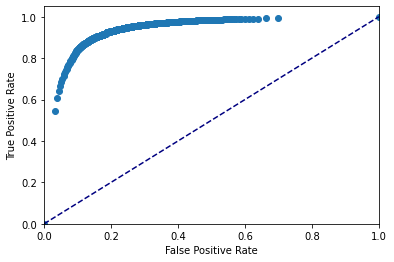

In [ ]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.scatter(roc_eval['roc_curve']['fpr'],
            roc_eval['roc_curve']['tpr'],
            label = "ROC Curve")
plt.plot ([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Apply the learned model to understand sentiment for Giraffe
Apply the sentiment classifier to better understand the Giraffe reviews

In [ ]:
products['predicted_sentiment'] = sentiment_model.predict(products, output_type = 'probability')

In [ ]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",1


In [ ]:
giraffe_reviews = products[products['name']== 'Vulli Sophie the Giraffe Teether']

In [ ]:
giraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",1
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ...",1
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",1
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",1
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,This product is without adoubt the best on the ...,5.0,"{'belongs': 1.0, 'dog':1.0, 'if': 1.0, 'bewa ...",1


# Sort the Giraffe reviews according to predicted sentiment

In [ ]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [ ]:
giraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'11': 1.0, 'prisrob':1.0, '12': 1.0, 'who': ...",1
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'around': 1.0,'explore': 1.0, 'they': ...",1
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'will': 1.0, '15months':1.0, 'would': 2.0, ...",1
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'out': 1.0, 'would':1.0, 've': 1.0, 'enou ...",1
Vulli Sophie the GiraffeTeether ...,"As every mom knows, youalways want to give your ...",5.0,"{'whether': 1.0,'neutral': 1.0, 'gend ...",1
Vulli Sophie the GiraffeTeether ...,My Mom-in-Law boughtSophie for my son whe ...,5.0,"{'penny': 1.0, 'little':1.0, 'perfect': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,"My 4 month old son isteething, and I've tried ...",4.0,"{'worth': 1.0, 'works':1.0, 'teether': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,Let me just start off byaddressing the choking ...,5.0,"{'question': 1.0, 'must':1.0, 'overall': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'makers': 1.0, 'or':1.0, 'take': 1.0, 'can': ...",1
Vulli Sophie the GiraffeTeether ...,"I admit, I didn't getSophie the Giraffe at ...",4.0,"{'dye': 1.0, 'of': 1.0,'cause': 1.0, 'fade': ...",1


In [ ]:
giraffe_reviews.tail()

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,My 7 1/2 month oldgrandbaby was sittng up ...,1.0,"{'sopie': 1.0, 'with':1.0, 'be': 1.0, 'shou ...",0
Vulli Sophie the GiraffeTeether ...,I was so looking forwardto getting this for my ...,1.0,"{'amazon': 1.0, 'back':1.0, 'by': 1.0, 'more': ...",0
Vulli Sophie the GiraffeTeether ...,Received the product andsmells like cheap rub ...,1.0,"{'was': 1.0, 'as': 1.0,'still': 1.0, 'but': ...",0
Vulli Sophie the GiraffeTeether ...,I got one of these as ashowe gift that my baby ...,1.0,"{'typical': 1.0, 'paint':1.0, 'came': 1.0, 'mi ...",0
Vulli Sophie the GiraffeTeether ...,When we first got it Ithought did my ...,2.0,"{'mom': 1.0, 'teethers':1.0, 'btw': 1.0, 'oth ...",0
Vulli Sophie the GiraffeTeether ...,When I received this thepaint was peeling off in ...,1.0,"{'risk': 1.0, 'but': 1.0,'help': 1.0, 'terrible': ...",0
Vulli Sophie the GiraffeTeether ...,"""Sophie the Giraffe"" hastested positive for ...",1.0,"{'ingest': 1.0, 'they':1.0, 'naturally': 1.0, ...",0
Vulli Sophie the GiraffeTeether ...,"My son (now 2.5) LOVEDhis Sophie, and I bought ...",1.0,"{'exaggerated': 1.0,'are': 1.0, 'a': 3.0, ...",0
Vulli Sophie the GiraffeTeether ...,I wanted to love thisproduct and was excited ...,1.0,"{'risk': 1.0, 'ready':1.0, 'bummed': 1.0, ...",0
Vulli Sophie the GiraffeTeether ...,This children's toy isnostalgic and very cute. ...,1.0,"{'amazon': 1.0, 'from':1.0, 'one': 1.0, 'by': ...",0


## Show the most positive reviews

In [ ]:
giraffe_reviews[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [ ]:
giraffe_reviews[1]['review']

'I\'ll be honest...I bought this toy because all the hip parents seem to have one too and I wanted to be a part of the "hip parent" crowd. The price-tag was somewhat of a deterent but I prevailed and purchased this teether for my daughter.At first, Lily didn\'t know what to make of of Sophie and showed little interest in the polka-dotted creature. I continued to introduce Lily to Sophie and kept the toy in the carrier so that it was on-hand during transitions. Eventually, Lily discovered what a wonderful experience it was to gnaw on the hooves and ears and these two have never been far apart since.Lily really enjoys gumming all the different parts of Sophie like no other teether we have. The size of the toy is great as it is somewhat substantial and so easy for a little one to grasp and hold onto. Lily really enjoys hearing Sophie squeak and will smile whenever Sophie makes a noise or pops her head up from Mommy\'s lap to say hello.People have stopped and commented on Sophie and to the

# Most negative reivews

In [ ]:
giraffe_reviews[-1]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [ ]:
giraffe_reviews[-2]['review']

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 

# Assignment Week 3

In [ ]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

Use .apply() to build a new feature with the counts for each of the selected_words:  In the notebook above, we created a column ‘word_count’ with the word counts for each review.  Our first task is to create a new column in the products SFrame with the counts for each selected_word above, and, in the process, we will see how the method .apply() can be used to create new columns in our data (our features) and how to use a Python function, which is an extremely useful concept to grasp! 

Our first goal is to create a column products[‘awesome’] where each row contains the number of times the word ‘awesome’ showed up in the review for the corresponding product, and 0 if the review didn’t show up.  One way to do this is to look at the each row ‘word_count’ column and follow this logic:  

* If ‘awesome’ shows up in the word counts for a particular product (row of the products SFrame), then we know how often ‘awesome’ appeared in the review, 

* if ‘awesome’ doesn’t appear in the word counts, then it didn’t appear in the review, and we should set the count for ‘awesome’ to 0 in this review.  

In [ ]:
def awesome_count(word_count):
    if 'awesome' in word_count:
        return word_count['awesome']
    return 0

products['awesome'] = products['word_count'].apply(awesome_count)

def great_count(word_count):
    if 'great' in word_count:
        return word_count['great']
    return 0

products['great'] = products['word_count'].apply(great_count)

def fantastic_count(word_count):
    if 'fantastic' in word_count:
        return word_count['fantastic']
    return 0

products['fantastic'] = products['word_count'].apply(fantastic_count)

def amazing_count(word_count):
    if 'amazing' in word_count:
        return word_count['amazing']
    return 0

products['amazing'] = products['word_count'].apply(amazing_count)

def love_count(word_count):
    if 'love' in word_count:
        return word_count['love']
    return 0

products['love'] = products['word_count'].apply(love_count)

def horrible_count(word_count):
    if 'horrible' in word_count:
        return word_count['horrible']
    return 0

products['horrible'] = products['word_count'].apply(horrible_count)

def bad_count(word_count):
    if 'bad' in word_count:
        return word_count['bad']
    return 0

products['bad'] = products['word_count'].apply(bad_count)

def terrible_count(word_count):
    if 'terrible' in word_count:
        return word_count['terrible']
    return 0

products['terrible'] = products['word_count'].apply(terrible_count)

def awful_count(word_count):
    if 'awful' in word_count:
        return word_count['awful']
    return 0

products['awful'] = products['word_count'].apply(awful_count)

def wow_count(word_count):
    if 'wow' in word_count:
        return word_count['wow']
    return 0

products['wow'] = products['word_count'].apply(wow_count)

def hate_count(word_count):
    if 'hate' in word_count:
        return word_count['hate']
    return 0

products['hate'] = products['word_count'].apply(hate_count)

* First, you will use a Python function to define the logic above.  You will write a function called awesome_count which takes in the word counts and returns the number of times ‘awesome’ appears in the reviews.

* Next, you will use .apply() to iterate awesome_count for each row of products[‘word_count’] and create a new column called ‘awesome’ with the resulting counts.  Here is what that looks like:

In [ ]:
products['awesome'] = products['word_count'].apply(awesome_count)

In [ ]:
products.head()

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'highly': 1.0, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'of': 1.0,'the': 1.0, 'than': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'approach': 2.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",1


* Using the .sum() method on each of the new columns you created, answer the following questions:  Out of the selected_words, which one is most used in the dataset?  Which one is least used? Save these results to answer the quiz at the end.

In [ ]:
print ('Word count value:')

for word in selected_words:
    print ('{0}: {1}'.format(word, products[word].sum()))

Word count value:
awesome: 3892.0
great: 55791.0
fantastic: 1664.0
amazing: 2628.0
love: 41994.0
horrible: 1110
bad: 4183
terrible: 1146.0
awful: 687
wow: 425
hate: 1107


**2.  Create a new sentiment analysis model using only the selected_words as features:**  In the Jupyter Notebook above, we used word counts for all words as features for our sentiment classifier.  Now, you are just going to use the selected_words:

In [ ]:
train_data,test_data = products.random_split(.8, seed=0)

* Train a logistic regression classifier (use turicreate.logistic_classifier.create) using just the selected_words.  Hint:  you can use this parameter in the .create() call to specify the features used to be exactly the new columns you just created:

In [ ]:
# features=selected_words

Call your new model: selected_words_model.

In [ ]:
selected_words_model = turicreate.logistic_classifier.create(train_data,
                                                     target='sentiment',
                                                     features=selected_words,
                                                     validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.265315     | 0.847401          | 0.845874            |

| 2         | 3        | 0.418795     | 0.847514          | 0.846085            |

| 3         | 4        | 0.580593     | 0.847626          | 0.846115            |

| 4         | 5        | 0.737748     | 0.847708          | 0.846385            |

| 5         | 6        | 0.890433     | 0.847708          | 0.846385            |

| 6         | 7        | 1.042639     | 0.847708          | 0.846385            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

* You will now examine the weights the learned classifier assigned to each of the 11 words in selected_words and gain intuition as to what the ML algorithm did for your data using these features. In Turi Create, a learned model, such as the selected_words_model, has a field 'coefficients', which lets you look at the learned coefficients.  You can access it by using:

In [ ]:
# selected_words_model['coefficients']

In [ ]:
coef = selected_words_model.coefficients

The result has a column called ‘value’, which contains the weight learned for each feature.  

In [ ]:
coef

name,index,class,value,stderr
(intercept),None,1,1.3365913848878148,0.008929969787657532
awesome,None,1,1.1335346660341103,0.08399643983187567
great,None,1,0.8630655001195999,0.018955052444380473
fantastic,None,1,0.8858047568813963,0.11167591293399713
amazing,None,1,1.1000933113659914,0.09954776260465965
love,None,1,1.3592688669224757,0.028068300152099997
horrible,None,1,-2.251335236759124,0.08020249388788399
bad,None,1,-0.9914778800650894,0.03848428664699065
terrible,None,1,-2.2236614360851554,0.07731736203785729
awful,None,1,-2.05290820403138,0.1009973543525922


Using this approach, sort the learned coefficients according to the ‘value’ column using .sort().  Out of the 11 words in selected_words, which one got the most positive weight?  Which one got the most negative weight?  Do these values make sense for you?   Save these results to answer the quiz at the end.

In [ ]:
coef = coef.sort('value', ascending=False)

In [ ]:
coef

name,index,class,value,stderr
love,None,1,1.3592688669224757,0.028068300152099997
(intercept),None,1,1.3365913848878148,0.008929969787657532
awesome,None,1,1.1335346660341103,0.08399643983187567
amazing,None,1,1.1000933113659914,0.09954776260465965
fantastic,None,1,0.8858047568813963,0.11167591293399713
great,None,1,0.8630655001195999,0.018955052444380473
wow,None,1,-0.00953823606771224,0.1604641122471162
bad,None,1,-0.9914778800650894,0.03848428664699065
hate,None,1,-1.3484407222463402,0.07715698604297318
awful,None,1,-2.05290820403138,0.1009973543525922


In [ ]:
coef.sort('value', ascending=True)

name,index,class,value,stderr
horrible,None,1,-2.251335236759124,0.08020249388788399
terrible,None,1,-2.2236614360851554,0.07731736203785729
awful,None,1,-2.05290820403138,0.1009973543525922
hate,None,1,-1.3484407222463402,0.07715698604297318
bad,None,1,-0.9914778800650894,0.03848428664699065
wow,None,1,-0.00953823606771224,0.1604641122471162
great,None,1,0.8630655001195999,0.018955052444380473
fantastic,None,1,0.8858047568813963,0.11167591293399713
amazing,None,1,1.1000933113659914,0.09954776260465965
awesome,None,1,1.1335346660341103,0.08399643983187567


**3.  Comparing the accuracy of different sentiment analysis model**:  Using the method

In [ ]:
# .evaluate(test_data)

What is the accuracy of the selected_words_model on the test_data?  What was the accuracy of the sentiment_model that we learned using all the word counts in the Jupyter Notebook above from the lectures?  What is the accuracy majority class classifier on this task?  How do you compare the different learned models with the baseline approach where we are just predicting the majority class?    Save these results to answer the quiz at the end.

Hint: we discussed the majority class classifier in lecture, which simply predicts that every data point is from the most common class.  This is baseline is something we definitely want to beat with models we learn from data.  

In [ ]:
selected_words_model.evaluate(test_data)

{'accuracy': 0.8463848186404036,
 'auc': 0.6935096220934976,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  159  |
 |      0       |        0        |  371  |
 |      0       |        1        |  4957 |
 |      1       |        1        | 27817 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9157860082304526,
 'log_loss': 0.3962265467087835,
 'precision': 0.8487520595594068,
 'recall': 0.9943165570488991,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 5328 

In [ ]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.9176975738650012,
 'auc': 0.9258242975424673,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1397 |
 |      1       |        0        |  1344 |
 |      0       |        0        |  3931 |
 |      1       |        1        | 26632 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.951057941255245,
 'log_loss': 0.33047871872209683,
 'precision': 0.9501587641371436,
 'recall': 0.9519588218472976,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0 

In [ ]:
selected_words_model.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 5328 |
 |   0.001   | 0.9994369369369369 | 1.0 | 27976 | 5328 |
 |   0.002   | 0.9992492492492493 | 1.0 | 27976 | 5328 |
 |   0.003   | 0.9990615615615616 | 1.0 | 27976 | 5328 |
 |   0.004   | 0.9990615615615616 | 1.0 | 27976 | 5328 |
 |   0.005   | 0.9981231231231231 | 1.0 | 27976 | 5328 |
 |   0.006   | 0.9981231231231231 | 1.0 | 27976 | 5328 |
 |   0.007   | 0.9979354354354354 | 1.0 | 27976 | 5328 |
 |   0.008   | 0.9973723723723724 | 1.0 | 27976 | 5328 |
 |   0.009   | 0.9971846846846847 | 1.0 | 27976 | 5328 |
 +-----------+--------------------+-----+-------+------+
 [1001 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(nu

In [ ]:
roc_selected = selected_words_model.evaluate(test_data, metric='roc_curve')

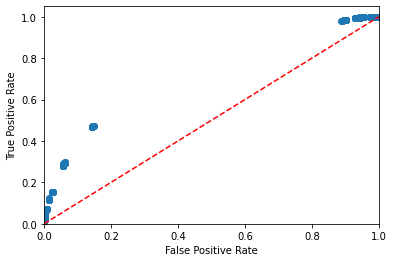

In [ ]:
#import matplotlib.pyplot as plt
#%matplotlib inline

plt.scatter(roc_selected['roc_curve']['fpr'],
            roc_selected['roc_curve']['tpr'],
            label = "ROC Curve")
plt.plot ([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
roc_selected

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 5328 |
 |   0.001   | 0.9994369369369369 | 1.0 | 27976 | 5328 |
 |   0.002   | 0.9992492492492493 | 1.0 | 27976 | 5328 |
 |   0.003   | 0.9990615615615616 | 1.0 | 27976 | 5328 |
 |   0.004   | 0.9990615615615616 | 1.0 | 27976 | 5328 |
 |   0.005   | 0.9981231231231231 | 1.0 | 27976 | 5328 |
 |   0.006   | 0.9981231231231231 | 1.0 | 27976 | 5328 |
 |   0.007   | 0.9979354354354354 | 1.0 | 27976 | 5328 |
 |   0.008   | 0.9973723723723724 | 1.0 | 27976 | 5328 |
 |   0.009   | 0.9971846846846847 | 1.0 | 27976 | 5328 |
 +-----------+--------------------+-----+-------+------+
 [1001 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(nu

**4.  Interpreting the difference in performance between the models:**  To understand why the model with all word counts performs better than the one with only the selected_words, we will now examine the reviews for a particular product.

* We will investigate a product named ‘Baby Trend Diaper Champ’.  (This is a trash can for soiled baby diapers, which keeps the smell contained.)

* Just like we did for the reviews for the giraffe toy in the Jupyter Notebook in the lecture video, before we start our analysis you should select all reviews where the product name is ‘Baby Trend Diaper Champ’.  Let’s call this table diaper_champ_reviews.

* Again, just as in the video, use the sentiment_model to predict the sentiment of each review in diaper_champ_reviews and sort the results according to their ‘predicted_sentiment’.

* What is the ‘predicted_sentiment’ for the most positive review for ‘Baby Trend Diaper Champ’ according to the sentiment_model from the Jupyter Notebook from lecture?  Save this result to answer the quiz at the end.

* Now use the selected_words_model you learned using just the selected_words to predict the sentiment most positive review you found above. Hint: if you sorted the diaper_champ_reviews in descending order (from most positive to most negative), this command will be helpful to make the prediction you need:

In [ ]:
# selected_words_model.predict(diaper_champ_reviews[0:1], output_type='probability')

In [ ]:
diaper_champ_reviews = products[products['name'] == 'Baby Trend Diaper Champ']

In [ ]:
diaper_champ_reviews

name,review,rating,word_count,sentiment
Baby Trend Diaper Champ,Ok - newsflash. Diapersare just smelly. We've ...,4.0,"{'convenient': 1.0,'more': 1.0, 'trash': ...",1
Baby Trend Diaper Champ,"My husband and I selectedthe Diaper ""Champ"" ma ...",1.0,"{'system': 1.0, 'try':1.0, 're': 1.0, 'still': ...",0
Baby Trend Diaper Champ,Excellent diaper disposalunit. I used it in ...,5.0,"{'nose': 1.0, 'for': 2.0,'investment': 1.0, ...",1
Baby Trend Diaper Champ,We love our diaper champ.It is very easy to use ...,5.0,"{'out': 1.0, 'pull': 1.0,'open': 1.0, 'pail': ...",1
Baby Trend Diaper Champ,Two girlfriends and twofamily members put me ...,5.0,"{'winter': 1.0,'outside': 1.0, 'day': ...",1
Baby Trend Diaper Champ,I waited to review thisuntil I saw how it ...,4.0,"{'mom': 1.0, 'my': 1.0,'empty': 2.0, 'poop': ...",1
Baby Trend Diaper Champ,I have had a diaper geniefor almost 4 years since ...,1.0,"{'yuck': 1.0, 'clean':1.0, 'all': 1.0, 'tra ...",0
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'price': 1.0,'suggestions': 1.0, ...",1
Baby Trend Diaper Champ,I am so glad I got theDiaper Champ instead of ...,5.0,"{'best': 1.0, 'that':1.0, 'handle': 1.0, ' ...",1
Baby Trend Diaper Champ,We had 2 diaper Genie'sboth given to us as a ...,4.0,"{'no': 1.0, 'regular':1.0, 'part': 1.0, ...",1


In [ ]:
diaper_champ_reviews['predicted_sentiment'] = sentiment_model.predict(diaper_champ_reviews, output_type='probability')

In [ ]:
diaper_champ_reviews = diaper_champ_reviews.sort('predicted_sentiment', ascending=False)

In [ ]:
diaper_champ_reviews

name,review,rating,word_count,sentiment
Baby Trend Diaper Champ,I read a review belowthat can explain exactly ...,4.0,"{'key': 1.0, 'have': 1.0,'pieces': 1.0, 'betwe ...",1
Baby Trend Diaper Champ,I have never written areview for Amazon but I ...,5.0,"{'priceless': 1.0,'knows': 1.0, 'parent': ...",1
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'price': 1.0,'suggestions': 1.0, ...",1
Baby Trend Diaper Champ,Baby Luke can turn aclean diaper to a dirty ...,5.0,"{'around': 1.0, 'any':1.0, 't': 1.0, 'isn': ...",1
Baby Trend Diaper Champ,Diaper Champ or DiaperGenie? That was my ...,5.0,"{'either': 1.0, 'be':1.0, 't': 1.0, 'not': ...",1
Baby Trend Diaper Champ,I am one of those super-critical shoppers who ...,5.0,"{'hope': 1.0, 'make':1.0, 'slower': 1.0, ...",1
Baby Trend Diaper Champ,I LOOOVE this diaperpail! Its the easies ...,5.0,"{'buy': 1.0, 'product':1.0, 'recommend': 1.0, ...",1
Baby Trend Diaper Champ,"As a first time mother, Iwanted to get the best ...",5.0,"{'ll': 1.0, 'baby': 1.0,'recommended': 1.0, ' ...",1
Baby Trend Diaper Champ,I see that there arecomplaints of stinkiness ...,5.0,"{'very': 1.0, 'told':1.0, 'all': 1.0, ...",1
Baby Trend Diaper Champ,I have a 10 year olddaughter and an 8 month ...,5.0,"{'sorry': 1.0, 'be': 1.0,'you': 2.0, 'sell': 1.0, ...",1


In [ ]:
diaper_champ_reviews['predicted_sentiment'].max()

0.9999999999895941

In [ ]:
selected_words_model.predict(diaper_champ_reviews[0:1], output_type='probability')

dtype: float
Rows: 1
[0.7919288370624551]

In [ ]:
diaper_champ_reviews[0]['review']

"I read a review below that can explain exactly what we experienced. We've had it for 16 months and it has worked wonderful for us. No smells, change it out once a week, easy to clean. Then a diaper snagged this foam material in the head part, so I pulled the rest of the foam out. Big mistake!!! Now it can no loner retain the stinkiness and we're looking for a replacement. Be careful of overloading and never take out that foam piece that is cushioned between pieces. I have figured out that it is key to keeping the stink out."

In [ ]:
diaper_champ_reviews[0]['word_count']

{'16': 1.0,
 'a': 4.0,
 'and': 3.0,
 'be': 1.0,
 'below': 1.0,
 'between': 1.0,
 'big': 1.0,
 'can': 2.0,
 'careful': 1.0,
 'change': 1.0,
 'clean': 1.0,
 'cushioned': 1.0,
 'diaper': 1.0,
 'easy': 1.0,
 'exactly': 1.0,
 'experienced': 1.0,
 'explain': 1.0,
 'figured': 1.0,
 'foam': 3.0,
 'for': 3.0,
 'had': 1.0,
 'has': 1.0,
 'have': 1.0,
 'head': 1.0,
 'i': 3.0,
 'in': 1.0,
 'is': 2.0,
 'it': 5.0,
 'keeping': 1.0,
 'key': 1.0,
 'loner': 1.0,
 'looking': 1.0,
 'material': 1.0,
 'mistake': 1.0,
 'months': 1.0,
 'never': 1.0,
 'no': 2.0,
 'now': 1.0,
 'of': 2.0,
 'once': 1.0,
 'out': 5.0,
 'overloading': 1.0,
 'part': 1.0,
 'piece': 1.0,
 'pieces': 1.0,
 'pulled': 1.0,
 're': 1.0,
 'read': 1.0,
 'replacement': 1.0,
 'rest': 1.0,
 'retain': 1.0,
 'review': 1.0,
 'smells': 1.0,
 'snagged': 1.0,
 'so': 1.0,
 'stink': 1.0,
 'stinkiness': 1.0,
 'take': 1.0,
 'that': 4.0,
 'the': 5.0,
 'then': 1.0,
 'this': 1.0,
 'to': 2.0,
 'us': 1.0,
 've': 1.0,
 'we': 3.0,
 'week': 1.0,
 'what': 1.0,
 'won

In [ ]:
diaper_champ_reviews[1]['review']

'I have never written a review for Amazon but I saw some of the poor reviews on the Diaper Champ and had to add my two cents . . .When my sister got pregnant she could not decide if she should register for the Diaper Champ or the Diaper Genie.  She left it up to me and after reviewing both items I went with the Diaper Champ . . .  The idea of having to continually purchase bags for the Diaper Genie seemed like a waste when the Diaper Champ lets you use any type of bag . . .  My nephew is now over two years old and while he has begun potty training, my sister still uses the Diaper Champ I gave her . . .When it came time for me to choose a diaper disposal system, I put the Diaper Champ on my registry.  Yes, it can be a bit tricky to open (I found using two hands works best) but then again do I want something that is holding wet and otherwise dirty diapers to open easily?  True, the mechanism sometimes won\'t "swing" the dirty diaper into the pail but HELLO that is a sign that it is proba

In [ ]:
diaper_champ_reviews[-1]['review']

'My husband and I selected the Diaper "Champ" mainly because you can use ordinary trash bags and not be roped into buying the specialty refill bags, and it was moderately priced (a little less than the Diaper Dekor). It also seemed that the reviews of this product were generally more positive...The positives are:1. You can use any trash bag2. Easy to use and refillThe negatives are:1. The bag doesn\'t seal around the dirty diapers, so when it comes time to refill the bag, it\'s just like opening a regular trash can. Smells like the Champ is trying to knock YOU out with odor!2. The plastic seems to smell, ie. You put a dirty diaper in the hole, and flip the handle to dump the diaper into the champ. That "side" of the plastic dumper-thingie is in contact with the air inside the dirty diaper changer, so when you flip it over the next time to dispose of another diaper, you smell the last 8 diapers you put in there...pretty gross.3. The "odor seal" (some soft material) really seems to retai